In [34]:
# Required Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
# Create a data-frame of ratings
df = pd.read_csv('ratings.csv')

In [3]:
# Visualisation
df.sample(5)

,userId,movieId,rating,timestamp
33270,226,2617,3.5,1095662997
61174,400,1210,5.0,1498870163
25256,177,3556,4.0,1435535345
87047,561,105468,2.5,1491091604
64700,414,59037,2.5,1273977833


In [4]:
# Dropping timestamp as it isn't required
df = df.drop(columns = 'timestamp')

In [5]:
# Checking
df.sample(5)

,userId,movieId,rating
75915,477,33794,4.0
60540,391,1246,4.0
81401,514,69453,2.0
32488,221,4338,4.5
89126,577,1275,4.0


In [6]:
# Convert the df into more easily understable format (pivot table)
df1 = df.pivot_table(index='movieId', columns='userId', values='rating')

In [7]:
# Checking
df1

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# min and max values of ratings
print('min rating is : ', np.min(df['rating'].to_numpy()))
print('max rating is : ', np.max(df['rating'].to_numpy()))

min rating is :  0.5
max rating is :  5.0


In [9]:
# Now that min rating given is 0.5 so let's just
# replace the Nan values with 0 {easy understanding}
df1.fillna(0, inplace=True)

In [10]:
# Checking
df1

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Not all the users and the movies are trustworthy
* What I mean by that is say there is a movie that is only watched and rated by 2 or 5 users it is not so popular meaning it won't interest the larges mass
* Similar thing can be said for the sake of users where is a user only rated 10 movies he might not be such a truth worth critique whose opinion matters or is valuable
* Hence we will consider only those movies which have been rated by atleast 10 users and users who have atleast rated 50 movies

In [11]:
# Get the usercount of each movieId
no_user_voted = df['movieId'].value_counts()
no_user_voted

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

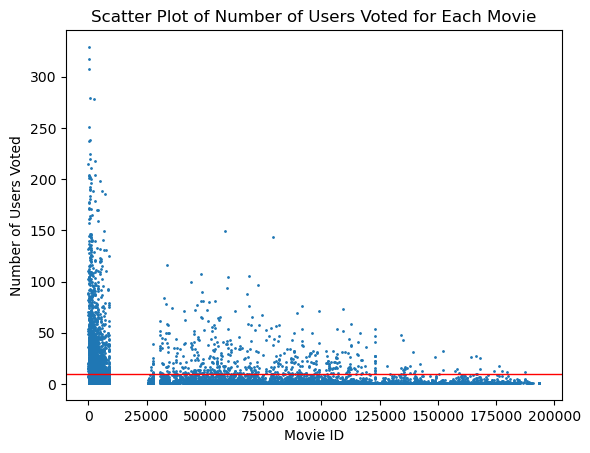

In [12]:
# plot
plt.scatter(no_user_voted.index, no_user_voted, s = 1)
plt.axhline(y=10, color='r', linestyle='-', linewidth = 1)
plt.title('Scatter Plot of Number of Users Voted for Each Movie')
plt.xlabel('Movie ID')
plt.ylabel('Number of Users Voted')
plt.show()

In [13]:
# Get the h usermovies rated count of eacId
no_movies_voted = df['userId'].value_counts()
no_movies_voted

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: count, Length: 610, dtype: int64

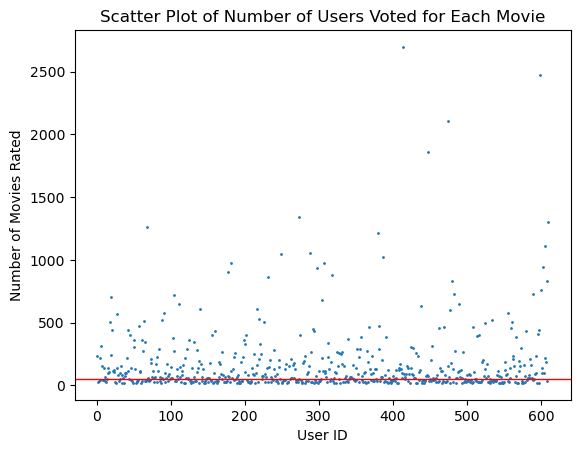

In [14]:
# plot
plt.scatter(no_movies_voted.index, no_movies_voted, s = 1)
plt.axhline(y=50, color='r', linestyle='-', linewidth = 1)
plt.title('Scatter Plot of Number of Users Voted for Each Movie')
plt.xlabel('User ID')
plt.ylabel('Number of Movies Rated')
plt.show()

In [15]:
# Get the rows and columns that are to be kept
rows_to_keep = no_user_voted[no_user_voted > 10].index
columns_to_keep = no_movies_voted[no_movies_voted > 50].index

# Extract them from the df1 abd overwrite itdf1.columns = df1.columns.astype(str).tolist()
df1 = df1.loc[rows_to_keep, columns_to_keep]

In [16]:
# Final dataset to be used for model after sorting
df1 = df1.sort_index(axis=1).sort_index(axis=0)
# Create a dictionary of all those movieId based on userId as key
indices = {}
for column in df1.columns:
    indices[column] = df1[df1[column] != 0].index.tolist()

# Transposing as it is easier to handle
df1 = df1.transpose()
df1

movieId,1,2,3,5,6,7,9,10,11,12,...,159093,164179,166528,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,5.0,4.0,4.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,4.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,2.5,0.0,0.0,0.0,0.0,2.5,0.0,0.0,2.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between users
user_similarity = cosine_similarity(df1) 
user_similarity_df = pd.DataFrame(user_similarity, index=df1.index, columns=df1.index)

In [18]:
# similarity 
user_similarity_df

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.222592,0.154845,0.172873,0.020610,0.143281,0.171103,0.181110,0.277343,0.247073,...,0.339441,0.087500,0.177846,0.303613,0.079755,0.173354,0.227410,0.294444,0.320707,0.196737
4,0.222592,1.000000,0.104152,0.130424,0.039595,0.061612,0.079262,0.182762,0.158323,0.147400,...,0.258329,0.097114,0.139881,0.393936,0.062210,0.105924,0.267954,0.151207,0.171938,0.146852
6,0.154845,0.104152,1.000000,0.090671,0.027330,0.261448,0.078993,0.057677,0.104441,0.145904,...,0.238420,0.025536,0.519332,0.136802,0.463475,0.138146,0.147205,0.191082,0.214309,0.078277
7,0.172873,0.130424,0.090671,1.000000,0.156559,0.208292,0.242816,0.167518,0.255873,0.310400,...,0.255581,0.221830,0.133943,0.142274,0.069260,0.258716,0.274294,0.203150,0.352245,0.257108
10,0.020610,0.039595,0.027330,0.156559,1.000000,0.032733,0.127905,0.116169,0.084233,0.146908,...,0.128234,0.225605,0.015981,0.038552,0.014524,0.130196,0.131048,0.012793,0.095104,0.181875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.173354,0.105924,0.138146,0.258716,0.130196,0.125683,0.153551,0.095777,0.199894,0.203548,...,0.305640,0.140817,0.132634,0.114779,0.099672,1.000000,0.215276,0.143312,0.215675,0.176078
606,0.227410,0.267954,0.147205,0.274294,0.131048,0.100483,0.238728,0.255188,0.304728,0.354333,...,0.441858,0.246271,0.157610,0.440844,0.091470,0.215276,1.000000,0.212444,0.365773,0.329441
607,0.294444,0.151207,0.191082,0.203150,0.012793,0.292494,0.183870,0.115673,0.243977,0.220684,...,0.253820,0.100737,0.210754,0.271978,0.155919,0.143312,0.212444,1.000000,0.302801,0.188773


In [19]:
# take userId from input
userID = int(input("Enter USER_ID : "))

Enter USER_ID : 6


In [20]:
# for the user
user_similarity_df.loc[userID]

userId
1      0.154845
4      0.104152
6      1.000000
7      0.090671
10     0.027330
         ...   
605    0.138146
606    0.147205
607    0.191082
608    0.214309
610    0.078277
Name: 6, Length: 378, dtype: float64

In [21]:
# Sort and consider only top 20 users neglecting the user itself
sorted_indexes = user_similarity_df.loc[userID].sort_values(ascending=False).index
top_similar_users = sorted_indexes[1:21]
top_similar_users

Index([117, 181,  58, 240, 411,  43, 559, 592, 447, 584, 436, 404, 136, 284,
       446, 470, 174, 602, 321, 314],
      dtype='int64', name='userId')

In [22]:
user_similarity_df.loc[userID, 156]

0.1335968481143323

In [23]:
# Weighted average of movies rated which are not viewed by the user
# But have been watched by similar users(Neighbourhood)
movies_pred = []
for col in df1.columns:
    # New movie
    if col not in indices[userID]:
        col_sum  = 0
        for user in top_similar_users:
            col_sum  += df1.loc[user, col]
            col_avg = col_sum / len(top_similar_users)
        movies_pred.append(col_avg)
    else:
        movies_pred.append(-1)

In [24]:
# Get arguments for the sorted similarity_score for movies
movies_pred_sorted_desc = sorted(enumerate(movies_pred), key=lambda x: x[1], reverse=True)
# Considering top 5 recommandations
movies_pred_sorted_desc[:5]

[(206, 2.55), (281, 2.35), (29, 2.25), (196, 2.1), (253, 1.95)]

In [25]:
# Seperate the enumarate tuple
movies_arg = [movie for movie, _ in movies_pred_sorted_desc[:5]]
similarity_score = [score for _, score in movies_pred_sorted_desc[:5]]

In [26]:
# Fetching movieId based on arguments
moviesId = [df1.columns[x] for x in movies_arg]
moviesId

[442, 648, 39, 420, 551]

In [27]:
# Get data about movies
Data = pd.read_csv('data_prml.csv')
Data = Data.drop(columns = 'Keywords')

# Movies to be sliced
indii = Data[Data['movieId'].isin(moviesId)].index
Recommendations = Data.loc[indii]

# Adding a new column showing how Recommended it is
Recommendations.loc[:, 'Recommendation_rating'] = similarity_score

# Display
Recommendations = Recommendations.reset_index(drop=True)
Recommendations.index = Recommendations.index + 1
Recommendations

,movieId,genres,Title,Year,imdbId,tmdbId,Director,Stars,Recommendation_rating
1,39,"['Comedy', 'Romance']",Clueless,1995,112697,9603.0,['Amy Heckerling'],"['Alicia Silverstone', 'Stacey Dash', 'Brittan...",2.55
2,420,"['Action', 'Comedy', 'Crime', 'Thriller']",Beverly Hills Cop III,1994,109254,306.0,['John Landis'],"['Eddie Murphy', 'Jon Tenney', 'Joey Travolta'...",2.35
3,442,"['Action', 'Adventure', 'Sci-Fi']",Demolition Man,1993,106697,9739.0,['Marco Brambilla'],"['Sylvester Stallone', 'Wesley Snipes', 'Sandr...",2.25
4,551,"['Animation', 'Children', 'Fantasy', 'Musical']","Nightmare Before Christmas, The",1993,107688,9479.0,['Henry Selick'],"['Danny Elfman', 'Chris Sarandon', ""Catherine ...",2.10
5,648,"['Action', 'Adventure', 'Mystery', 'Thriller']",Mission: Impossible,1996,117060,954.0,['Brian De Palma'],"['Tom Cruise', 'Jon Voight', 'Emmanuelle Béart...",1.95
